# Nesta etapa inicial começaremos com o tratamento e estruturação dos dados a fim de gerar uma base bem consolidada onde podemos tirar todo proveito de suas informações para futura geração de um dashboard mais eficiente e representativo.

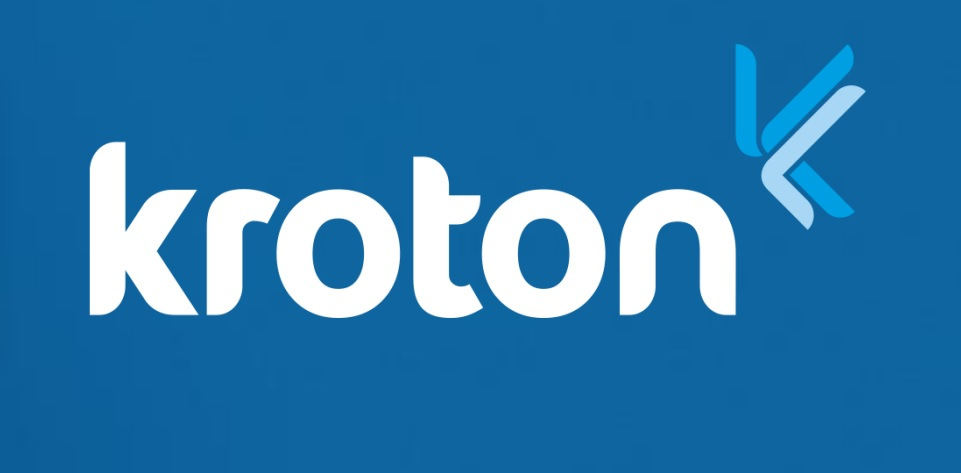

### 01 - Import de bibliotecas, pacotes essencias e definições de funções

In [1]:
#Pacotes e bibliotecas essenciais:
import pandas as pd
import numpy as np

In [2]:
#Funções:

def remove_dup(dataframe):
    
    """Checa e remove valores duplicados a partir de um dataframe qualquer. Retorna o número de registros removidos."""
    
    #Contagem de linhas iniciais:
    num_linhas_ini = dataframe.shape[0]
    
    #Remoção das duplicatas:
    dataframe.drop_duplicates(inplace = True)
    
    #Contagem de linhas restantes:
    num_linhas_fim = dataframe.shape[0]
    
    #Comparação final de linhas:
    if num_linhas_ini == num_linhas_fim:
        return print("Não existem valores duplicados.")
    else:
        return print("Foram removidos %d valores duplicados." % (num_linhas_ini - num_linhas_fim))

### 02 - Carregamento e prévia visualização das bases

#### Base histórica dos chamados abertos e fechados (call_hist_df)

In [4]:
#Carregamento da base:
call_hist_df = pd.read_csv("chamados_2019_hist.csv", sep = ";", encoding = "ISO-8859-1", low_memory = False)
call_hist_df.head()

,IDHISTORICO,IDCHAMADO,SITUACAO,OBSERVACAO,DATA,USUARIO,APONTAMENTO,CLASSIFICACAO
0,496880,249899,INI,NaN,02/01/2019 01:38:07,portal.aluno.kroton,NaN,NaN
1,502254,247892,ENC,Prezado (a) Sua solicitação não pode ser atend...,07/01/2019 15:14:09,FERNANDACFREITAS,NaN,NaN
2,502296,248095,ENC,"Prezado (a), Conforme análise, foi reconhecido...",07/01/2019 15:22:11,THAISNATALINA,NaN,NaN
3,505751,255340,INI,NaN,08/01/2019 09:41:13,portal.aluno.kroton,NaN,NaN
4,505752,255340,ENC,Solicitação encerrada via processo automático....,08/01/2019 09:41:19,WEBEXTRANETCHAMADO,NaN,NaN


In [5]:
#Tipagem dos campos, volumetria e checagem de valores nulos:
call_hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475493 entries, 0 to 475492
Data columns (total 8 columns):
IDHISTORICO      475493 non-null int64
IDCHAMADO        475493 non-null int64
SITUACAO         475493 non-null object
OBSERVACAO       305722 non-null object
DATA             475493 non-null object
USUARIO          475493 non-null object
APONTAMENTO      6984 non-null object
CLASSIFICACAO    62544 non-null object
dtypes: int64(2), object(6)
memory usage: 29.0+ MB


In [6]:
#Checagem de duplicatas:
remove_dup(call_hist_df)

Não existem valores duplicados.


In [7]:
call_hist_df.sort_values("IDHISTORICO", inplace = True)
call_hist_df.head()

,IDHISTORICO,IDCHAMADO,SITUACAO,OBSERVACAO,DATA,USUARIO,APONTAMENTO,CLASSIFICACAO
17203,496869,249916,INI,NaN,02/01/2019 00:31:28,portal.aluno.kroton,NaN,NaN
17204,496870,249917,INI,NaN,02/01/2019 00:32:19,portal.aluno.kroton,NaN,NaN
6239,496871,249870,INI,NaN,02/01/2019 00:36:24,portal.aluno.kroton,NaN,NaN
5051,496872,249897,INI,NaN,02/01/2019 00:46:37,portal.aluno.kroton,NaN,NaN
1571,496873,249898,INI,NaN,02/01/2019 01:13:36,portal.aluno.kroton,NaN,NaN


In [8]:
#Tratamento das colunas de texto onde temos valores nulos:
colunas_a_tratar = ["OBSERVACAO", "APONTAMENTO", "CLASSIFICACAO"]

for coluna in colunas_a_tratar:
    call_hist_df[coluna].replace(np.nan, "", inplace = True)

call_hist_df.head()

,IDHISTORICO,IDCHAMADO,SITUACAO,OBSERVACAO,DATA,USUARIO,APONTAMENTO,CLASSIFICACAO
17203,496869,249916,INI,,02/01/2019 00:31:28,portal.aluno.kroton,,
17204,496870,249917,INI,,02/01/2019 00:32:19,portal.aluno.kroton,,
6239,496871,249870,INI,,02/01/2019 00:36:24,portal.aluno.kroton,,
5051,496872,249897,INI,,02/01/2019 00:46:37,portal.aluno.kroton,,
1571,496873,249898,INI,,02/01/2019 01:13:36,portal.aluno.kroton,,


#### Base referente ao status de cada chamado (call_stat_df)

In [9]:
#Carregamento da base:
call_stat_df = pd.read_csv("status_chamados_2019.csv", sep = ";")
call_stat_df.head()

,IDCHAMADO,IDCHAMADOTIPO,IDITEMTIPO,CODPESSOA,PROTOCOLO,SITUACAO,USUARIOINICIO,USUARIOFIM,DATAINICIO,DATAFIM,REABERTURAALUNO,REABERTURAATEND,ALUCOD,ESPCOD
0,4168,16,3,"5,2416E+19",32839700.0,ENC,PATRICIAANDRE,JOSEGOES,22/03/2018 20:54,05/03/2019 11:32,0,0,2348320,13499
1,86623,48,3,"3,50011E+16",36214705.0,ENC,JESSICATALITA,BEATRIZADRYELLE,10/08/2018 14:43,19/02/2019 11:20,0,0,1082411,67348
2,66348,48,3,"5,2475E+19",35729986.0,ENC,ISABELLEGARCIA,ARIANENOLIVEIRA,30/07/2018 20:16,07/01/2019 12:51,0,0,1349559,11942
3,68322,47,3,"5,2503E+19",35796104.0,ENC,PAOLACOSTA,MONICALCOSTA,01/08/2018 16:43,16/01/2019 10:54,0,0,1940137,12793
4,80183,48,3,"5,2412E+19",35954157.0,ENC,MILLASILVA,JACQUELINEPEREIRA,06/08/2018 19:56,14/01/2019 09:01,0,0,3260885,12189


In [10]:
#Tipagem dos campos, volumetria e checagem de valores nulos:
call_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475510 entries, 0 to 475509
Data columns (total 14 columns):
IDCHAMADO          475510 non-null int64
IDCHAMADOTIPO      475510 non-null int64
IDITEMTIPO         475510 non-null int64
CODPESSOA          475510 non-null object
PROTOCOLO          316283 non-null float64
SITUACAO           475510 non-null object
USUARIOINICIO      475510 non-null object
USUARIOFIM         458825 non-null object
DATAINICIO         475510 non-null object
DATAFIM            458825 non-null object
REABERTURAALUNO    475510 non-null int64
REABERTURAATEND    475510 non-null int64
ALUCOD             475510 non-null int64
ESPCOD             475510 non-null int64
dtypes: float64(1), int64(7), object(6)
memory usage: 50.8+ MB


In [84]:
#Checagem de duplicatas:
remove_dup(call_stat_df)

Foram removidos 250481 valores duplicados.


In [56]:
#Tratamento das colunas de texto onde temos valores nulos:
colunas_a_tratar = ["USUARIOFIM", "DATAFIM", "PROTOCOLO"]

for coluna in colunas_a_tratar:
    if coluna == "DATAFIM":
        call_stat_df[coluna].replace(np.nan, "31/12/9999", inplace = True)
        call_stat_df[coluna].replace("", "31/12/9999", inplace = True)
    else:
        call_stat_df[coluna].replace(np.nan, "", inplace = True)
        
call_stat_df.head()

,IDCHAMADO,IDCHAMADOTIPO,IDITEMTIPO,CODPESSOA,PROTOCOLO,SITUACAO,USUARIOINICIO,USUARIOFIM,DATAINICIO,DATAFIM,REABERTURAALUNO,REABERTURAATEND,ALUCOD,ESPCOD
0,4168,16,3,"5,2416E+19",3.28397e+07,ENC,PATRICIAANDRE,JOSEGOES,22/03/2018 20:54,05/03/2019 11:32,0,0,2348320,13499
1,86623,48,3,"3,50011E+16",3.62147e+07,ENC,JESSICATALITA,BEATRIZADRYELLE,10/08/2018 14:43,19/02/2019 11:20,0,0,1082411,67348
2,66348,48,3,"5,2475E+19",3.573e+07,ENC,ISABELLEGARCIA,ARIANENOLIVEIRA,30/07/2018 20:16,07/01/2019 12:51,0,0,1349559,11942
3,68322,47,3,"5,2503E+19",3.57961e+07,ENC,PAOLACOSTA,MONICALCOSTA,01/08/2018 16:43,16/01/2019 10:54,0,0,1940137,12793
4,80183,48,3,"5,2412E+19",3.59542e+07,ENC,MILLASILVA,JACQUELINEPEREIRA,06/08/2018 19:56,14/01/2019 09:01,0,0,3260885,12189


#### Base com a descrição de cada tipo de chamado (call_class_df)

In [48]:
#Carregamento da base:
call_class_df = pd.read_csv("tipo_chamado.csv", sep = ";", encoding = "ISO-8859-1")
call_class_df.sort_values("IDCHAMADOTIPO").head(15)

,IDCHAMADOTIPO,IDAREA,DESCRICAO,PAI,ORDEM,URL,TITULO,TEXTO,SITUACAO,IDAREARESOLVEDORA,DIASLIMITEREA,FLAGANEXOENC,SOMENTEPORTAL
47,1,1,Ambiente Virtual (AVA),0,1,NaN,NaN,NaN,A,1.0,0,S,N
48,2,1,Problemas de acesso,1,1,NaN,NaN,NaN,A,1.0,0,N,N
49,3,1,Sem nenhum acesso,2,1,SolicitacaoAcademico/SemAcessoAVA,Aluno sem acesso ao Ambiente Virtual (AVA),"Prezado Colaborador,\n\n Antes de abrir ...",A,1.0,0,S,N
50,4,1,Tenho acesso mas faltam disciplinas,2,2,SolicitacaoAcademico/FaltaDisciplinaAVA,Aluno com ausência de disciplina no Ambiente V...,"Prezado Colaborador,\n\n Use essa solici...",A,1.0,0,S,N
51,5,1,Problemas com conteúdos disponibilizados,1,2,SolicitacaoAcademico/ProblemaConteudoAVA,Conteúdos indisponíveis no Ambiente Virtual (AVA),"Prezado Colaborador,\n\n Use essa solici...",A,1.0,0,S,N
52,6,1,Situação Acadêmica,0,2,NaN,NaN,NaN,A,1.0,0,N,N
53,7,1,Alterar situação acadêmica,6,1,SolicitacaoAcademico/AlterarSituacaoAcademica,Solicitação de alteração de situação acadêmica,"Prezado Colaborador,\n\n Use essa solic...",A,1.0,5,S,N
31,9,2,Boletos,0,3,NaN,NaN,NaN,A,NaN,0,N,N
32,10,2,Bolsas,0,4,NaN,NaN,NaN,A,NaN,0,N,N
33,11,2,Boleto com Valor Incorreto,9,1,NaN,NaN,NaN,A,1.0,5,N,N


In [80]:
call_class_df["DIASLIMITEREA"].drop_duplicates()

0     0
1     5
46    3
Name: DIASLIMITEREA, dtype: int64

In [41]:
#Tipagem dos campos, volumetria e checagem de valores nulos:
call_class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
IDCHAMADOTIPO        59 non-null int64
IDAREA               59 non-null int64
DESCRICAO            59 non-null object
PAI                  59 non-null int64
ORDEM                59 non-null int64
URL                  42 non-null object
TITULO               41 non-null object
TEXTO                39 non-null object
SITUACAO             59 non-null object
IDAREARESOLVEDORA    54 non-null float64
DIASLIMITEREA        59 non-null int64
FLAGANEXOENC         59 non-null object
SOMENTEPORTAL        59 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 6.1+ KB


In [42]:
#Checagem de duplicatas:
remove_dup(call_class_df)

Não existem valores duplicados.


### 03 - Montando o CUBO

In [81]:
#Vamos selecionar apenas as variáveis que desejamos de cada base:
colunas_02 = ["IDCHAMADO", "IDCHAMADOTIPO", "SITUACAO", "USUARIOFIM", "DATAINICIO", "DATAFIM", "REABERTURAALUNO", "ALUCOD", "ESPCOD"]
colunas_03 = ["IDCHAMADOTIPO", "DESCRICAO", "DIASLIMITEREA"]

df02 = call_stat_df[colunas_02]
df03 = call_class_df[colunas_03].sort_values("IDCHAMADOTIPO")

In [82]:
df02.head()

,IDCHAMADO,IDCHAMADOTIPO,SITUACAO,USUARIOFIM,DATAINICIO,DATAFIM,REABERTURAALUNO,ALUCOD,ESPCOD
0,4168,16,ENC,JOSEGOES,22/03/2018 20:54,05/03/2019 11:32,0,2348320,13499
1,86623,48,ENC,BEATRIZADRYELLE,10/08/2018 14:43,19/02/2019 11:20,0,1082411,67348
2,66348,48,ENC,ARIANENOLIVEIRA,30/07/2018 20:16,07/01/2019 12:51,0,1349559,11942
3,68322,47,ENC,MONICALCOSTA,01/08/2018 16:43,16/01/2019 10:54,0,1940137,12793
4,80183,48,ENC,JACQUELINEPEREIRA,06/08/2018 19:56,14/01/2019 09:01,0,3260885,12189


In [83]:
df03.head()

,IDCHAMADOTIPO,DESCRICAO,DIASLIMITEREA
47,1,Ambiente Virtual (AVA),0
48,2,Problemas de acesso,0
49,3,Sem nenhum acesso,0
50,4,Tenho acesso mas faltam disciplinas,0
51,5,Problemas com conteúdos disponibilizados,0


In [84]:
#Criando valores de data numéricos para DATAINICIO e DATAFIM:
df02_datini = [int(x[6:10]+x[3:5]+x[0:2]) for x in df02["DATAINICIO"]]
df02_datfim = [int(x[6:10]+x[3:5]+x[0:2]) for x in df02["DATAFIM"]]

#Setando estes novos valores nas variáveis:
df02.iloc[:, 4] = df02_datini
df02.iloc[:, 5] = df02_datfim

In [121]:
#Montando definitivamente o CUBO:
cubo = pd.merge(df02, df03, how = "left", on = "IDCHAMADOTIPO")

In [122]:
cubo.sort_values("DATAINICIO").head()

,IDCHAMADO,IDCHAMADOTIPO,SITUACAO,USUARIOFIM,DATAINICIO,DATAFIM,REABERTURAALUNO,ALUCOD,ESPCOD,DESCRICAO,DIASLIMITEREA
0,4168,16,ENC,JOSEGOES,20180322,20190305,0,2348320,13499,Ausência/Erro de desconto de pontualidade,0
150,58977,38,ENC,THAISMACHADO,20180717,20190225,0,380538,2519,Financiamento - FIES,5
2,66348,48,ENC,ARIANENOLIVEIRA,20180730,20190107,0,1349559,11942,Mensalidade / Taxa,5
3,68322,47,ENC,MONICALCOSTA,20180801,20190116,0,1940137,12793,Acordo,5
4,80183,48,ENC,JACQUELINEPEREIRA,20180806,20190114,0,3260885,12189,Mensalidade / Taxa,5


In [123]:
#Alterando alguns nomes de colunas apenas:
novos_labels = ["ID_CHAMADO", "ID_TIPO", "STATUS", "FECHADO_POR", "ABERTO_EM", "FECHADO_EM", "FLAG_REAB", "COD_ALUNO", "COD_CURSO", "DESC_CHAMADO", "SLA_EM_DIAS"]
cubo.columns = novos_labels
cubo.head()

,ID_CHAMADO,ID_TIPO,STATUS,FECHADO_POR,ABERTO_EM,FECHADO_EM,FLAG_REAB,COD_ALUNO,COD_CURSO,DESC_CHAMADO,SLA_EM_DIAS
0,4168,16,ENC,JOSEGOES,20180322,20190305,0,2348320,13499,Ausência/Erro de desconto de pontualidade,0
1,86623,48,ENC,BEATRIZADRYELLE,20180810,20190219,0,1082411,67348,Mensalidade / Taxa,5
2,66348,48,ENC,ARIANENOLIVEIRA,20180730,20190107,0,1349559,11942,Mensalidade / Taxa,5
3,68322,47,ENC,MONICALCOSTA,20180801,20190116,0,1940137,12793,Acordo,5
4,80183,48,ENC,JACQUELINEPEREIRA,20180806,20190114,0,3260885,12189,Mensalidade / Taxa,5


### 04 - Definição de algumas FLAG's para checagem de Perfomance, Backlog de Chamados e Reincidência

#### Checagem de Performance

In [124]:
#Para checarmos perfomance vamos apenas criar uma flag pra nos dizer se tivemos sucesso em fechar um chamado dentro do SLA.
#Primeiro vamos antes separar todo chamado que não foi aberto e fechado no mesmo mês. Para isso criaremos uma flag.
#Para todo chamado válido por assim dizer, checaremos se foi fechado dentro do prazo estimado pelo SLA.
#Excluiremos também todo chamado cancelado , em análise e apenas iniciado.

fechado_no_mes = [
        1 if (x // 100) == (cubo.loc[i, "FECHADO_EM"] // 100) and cubo.loc[i, "STATUS"] in ["ENC", "REA"]
        else 0
        for i, x in enumerate(cubo["ABERTO_EM"])]

In [125]:
flag = pd.Series(fechado_no_mes, index = cubo.index)

In [126]:
cubo["ANOMES_REF"] = cubo["ABERTO_EM"] // 100
cubo["FLAG_FECHADO_NO_MES"] = flag

In [166]:
cubo.head()

,ID_CHAMADO,ID_TIPO,STATUS,FECHADO_POR,ABERTO_EM,FECHADO_EM,FLAG_REAB,COD_ALUNO,COD_CURSO,DESC_CHAMADO,SLA_EM_DIAS,ANOMES_REF,FLAG_FECHADO_NO_MES
0,4168,16,ENC,JOSEGOES,20180322,20190305,0,2348320,13499,Ausência/Erro de desconto de pontualidade,0,201803,0
1,86623,48,ENC,BEATRIZADRYELLE,20180810,20190219,0,1082411,67348,Mensalidade / Taxa,5,201808,0
2,66348,48,ENC,ARIANENOLIVEIRA,20180730,20190107,0,1349559,11942,Mensalidade / Taxa,5,201807,0
3,68322,47,ENC,MONICALCOSTA,20180801,20190116,0,1940137,12793,Acordo,5,201808,0
4,80183,48,ENC,JACQUELINEPEREIRA,20180806,20190114,0,3260885,12189,Mensalidade / Taxa,5,201808,0


In [179]:
#Iremos criar agora a FLAG que caracteriza se um chamado foi fechado dentro do prazo:
dentro_do_sla = [
    1 if cubo.loc[i, "FLAG_FECHADO_NO_MES"] == 1
    and (pd.to_datetime(str(x)) - pd.to_datetime(str(cubo.loc[i, "ABERTO_EM"]))).days <= cubo.loc[i, "SLA_EM_DIAS"]
    else 0 for i, x in enumerate(cubo["FECHADO_EM"])]

In [183]:
cubo["FLAG_DENTRO_DO_SLA"] = pd.Series(dentro_do_sla, index = cubo.index)

In [184]:
cubo.head()

,ID_CHAMADO,ID_TIPO,STATUS,FECHADO_POR,ABERTO_EM,FECHADO_EM,FLAG_REAB,COD_ALUNO,COD_CURSO,DESC_CHAMADO,SLA_EM_DIAS,ANOMES_REF,FLAG_FECHADO_NO_MES,FLAG_DENTRO_DO_SLA
0,4168,16,ENC,JOSEGOES,20180322,20190305,0,2348320,13499,Ausência/Erro de desconto de pontualidade,0,201803,0,0
1,86623,48,ENC,BEATRIZADRYELLE,20180810,20190219,0,1082411,67348,Mensalidade / Taxa,5,201808,0,0
2,66348,48,ENC,ARIANENOLIVEIRA,20180730,20190107,0,1349559,11942,Mensalidade / Taxa,5,201807,0,0
3,68322,47,ENC,MONICALCOSTA,20180801,20190116,0,1940137,12793,Acordo,5,201808,0,0
4,80183,48,ENC,JACQUELINEPEREIRA,20180806,20190114,0,3260885,12189,Mensalidade / Taxa,5,201808,0,0


#### Para Backlog de Chamados basta apenas agruparmos pela colina STATUS e  contando todos os chamados abertos e em análise até o hoje.